In [1]:
##Importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (9,5)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
##importing dataset
df = pd.read_csv("bwc.csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [4]:
df.shape

(550, 7)

In [6]:
##dropping unwanted columns
df1 = df.copy()
df1.drop(['Price'],axis=1, inplace=True)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Year         550 non-null    int64  
 5   Genre        550 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 25.9+ KB


In [8]:
df1.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Year           0
Genre          0
dtype: int64

In [9]:
df1.describe()

,User Rating,Reviews,Year
count,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,2014.000000
std,0.226980,11731.132017,3.165156
min,3.300000,37.000000,2009.000000
25%,4.500000,4058.000000,2011.000000
50%,4.700000,8580.000000,2014.000000
75%,4.800000,17253.250000,2017.000000
max,4.900000,87841.000000,2019.000000


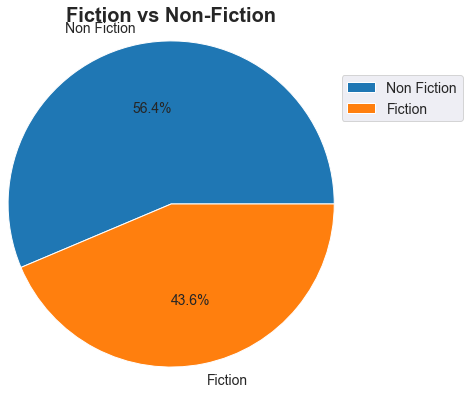

In [12]:
##Visualization
content = df1.Genre.value_counts()
plt.pie(content.values, labels=content.index, autopct='%1.1f%%', radius=1.5)
plt.legend(content.index, loc="upper center", bbox_to_anchor=(1.35, 1),ncol=1)
plt.title('Fiction vs Non-Fiction',y=1.15, fontsize=20,weight='bold')
plt.show()

In [31]:
df1.Reviews.value_counts()

8580     10
5069      9
21834     8
19546     7
19576     6
         ..
3428      1
14982     1
9867      1
13964     1
2052      1
Name: Reviews, Length: 346, dtype: int64

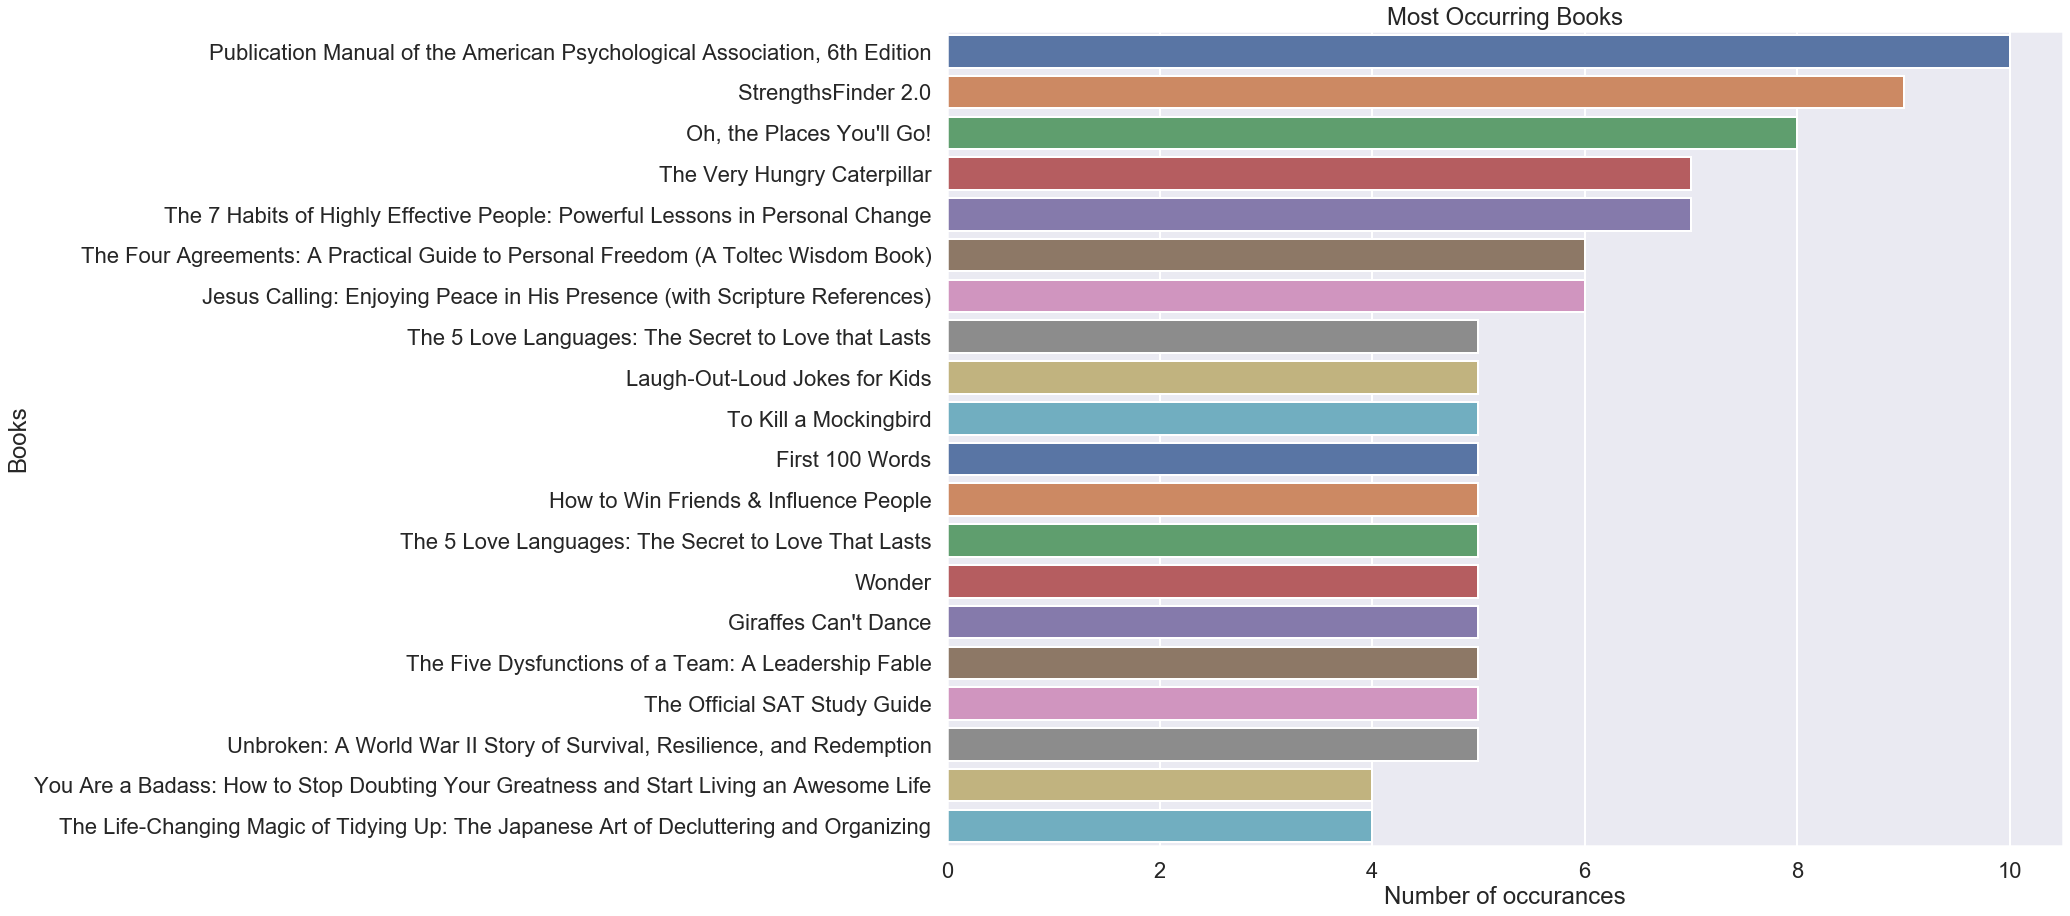

In [38]:
##Most Occurred book from top 20
sns.set_context('poster')
plt.figure(figsize=(20,15))
books = df1['Name'].value_counts()[:20]
review = df1.Reviews[:20]
sns.barplot(x = books, y = books.index, palette='deep')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()


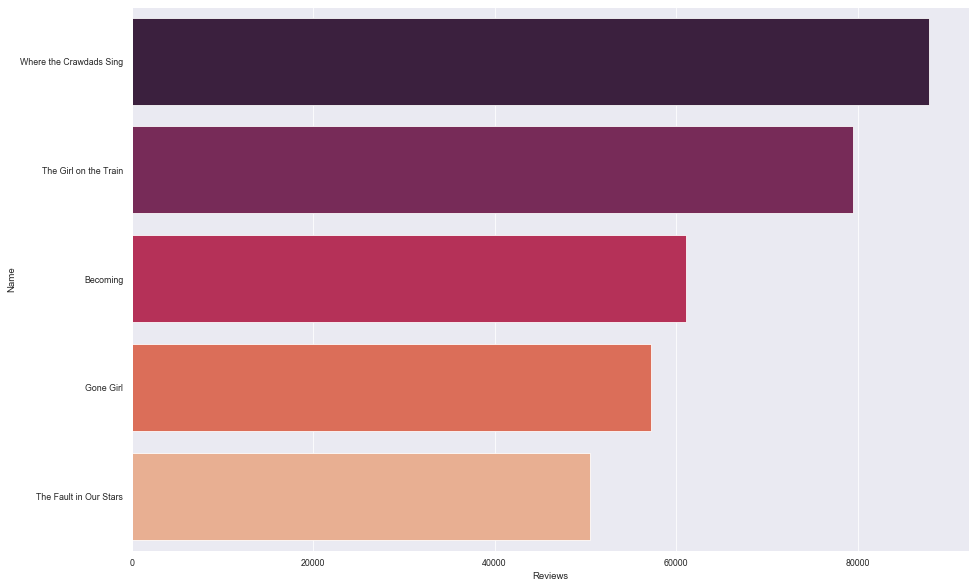

In [40]:
##Most rated top 10 books
most_rated = df1.sort_values('Reviews', ascending = False).head(10).set_index('Name')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['Reviews'], most_rated.index, palette='rocket')

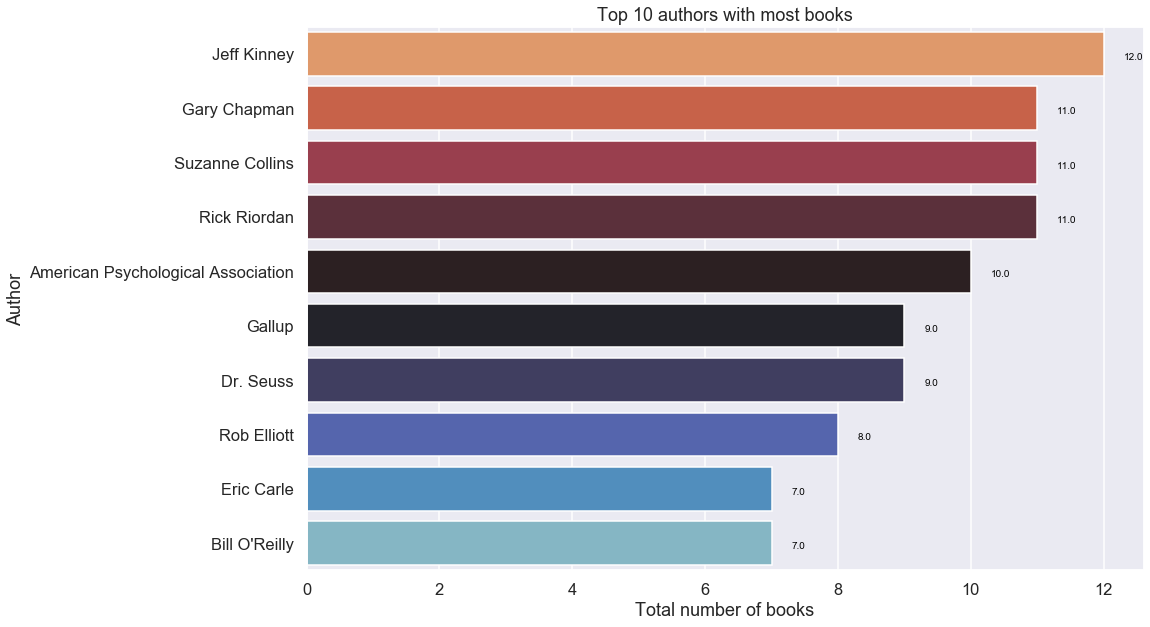

In [41]:
##authors with more number of books
sns.set_context('talk')
most_books = df.groupby('Author')['Name'].count().reset_index().sort_values('Name', ascending=False).head(10).set_index('Author')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['Name'], most_books.index, palette='icefire_r')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

<Figure size 1080x720 with 0 Axes>

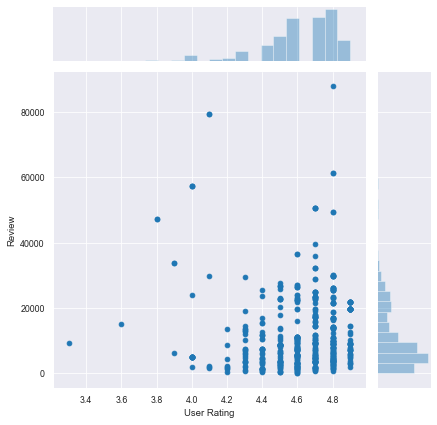

In [45]:
##Check for relation between User rating and Review
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax =sns.jointplot(x="User Rating",y='Reviews', kind='scatter',  data= df[['User Rating', 'Reviews']])
ax.set_axis_labels("User Rating", "Review")
plt.show()